What better way to get started with Python Data Science tools then through an analysis of TED Talks! As an introductory project, my goal was to gain practical experience with the Data Science packages numpy, pandas, matplotlib and seaborn, primarily used for analysis and visualization. Machine Learning is not a focus for this project. I've chosen to analyze the "TED main dataset", available on Kaggle. Coding was performed on Anaconda, using Spyder. Jupyter was used to publish this report.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import ast
import seaborn as sns

## Importing the Data Set

In [2]:
ttlk = pd.read_csv('/Users/pbibra/Data Science/Ted Analysis/ted-talks/ted_main.csv')
ttlk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


We begin by importing our dataset. From an intial screen of the dataset, variables of interest include comments and views (i.e. is there a relationship between the two), tags and duration. A separate analysis of ratings will be done using a classification model, in a different report.

## Maximum Values

In [3]:
#Max comments
mcomm = max(ttlk.loc[:,'comments'])
mcomm

6404

In [4]:
#Corresponding Name and Title
mcommfil =ttlk['comments'] > max(ttlk.loc[:,'comments']) - 1 
ttlkmcomm = ttlk[mcommfil]
np.array(ttlkmcomm.loc[:,'name'])

array(['Richard Dawkins: Militant atheism'], dtype=object)

In [5]:
#Max duration
mdur = max(ttlk.loc[:,'duration'])
mdur

5256

In [6]:
#Corresponding tags
mdurfil =ttlk['duration'] > max(ttlk.loc[:,'duration']) - 1 
ttlkmaxdur = ttlk[mdurfil]
np.array(ttlkmaxdur.loc[:,'tags'])

array([ "['biodiversity', 'biology', 'comedy', 'humor', 'life', 'religion', 'storytelling', 'writing']"], dtype=object)

In [7]:
#Max Views
mview = max(ttlk.loc[:,'views'])
mview

47227110

In [8]:
#Corresponding tags
mviewfil = ttlk['views'] > max(ttlk.iloc[:,16]) - 1
ttlkmaxview = ttlk[mviewfil]
np.array(ttlkmaxview.loc[:,'tags'])

array([ "['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"], dtype=object)

The purpose of this section was get my hands dirty with basic built-in functions in Python and numpy, and getting a feel for manipulating data sets using pandas. The maximum number of comments across all Ted Talks was 6404. This was attributed to the Ted Talk by Richard Dawkins, "Militant atheism". When looking at the longest Ted Talk (~ 1.5 hours), this was attributed to the tags ['biodiversity', 'biology', 'comedy', 'humor', 'life', 'religion', 'storytelling', 'writing']. When looking at the maximum number of views (47,227,110), the corresponding tags are ['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']. From the above, it would be interesting to further analyze tags and determing their popularity. 

## Theme Dataset

In [9]:
# Create new data frame with separate rows for each tag, time converted
ttlk['film_date'] = ttlk['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ttlk['published_date'] = ttlk['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ttlk['year'] = ttlk['film_date'].apply(lambda x: x.split('-')[2])
ttlk['month'] = ttlk['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
ttlk['day'] = ttlk['film_date'].apply(lambda x: x.split('-')[0])
ttlk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year,month,day
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb,24
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,Feb,24
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,Feb,23
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,Feb,25
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,Feb,21


In [10]:
# Creating a new data frame with each individual tag in a separate row. Column is called theme.
ttlk['tags'] = ttlk['tags'].apply(lambda x: ast.literal_eval(x))
s = ttlk.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
theme_ttlk = ttlk.drop('tags', axis=1).join(s)
theme_ttlk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,year,month,day,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb,24,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb,24,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb,24,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb,24,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb,24,education


The idea behind restruturing the dataset is to separate each value in the tags column and interpret them as a theme. Before that, all date-time values were converted from unix time into an interpretable format. 

## Analysis of Themes

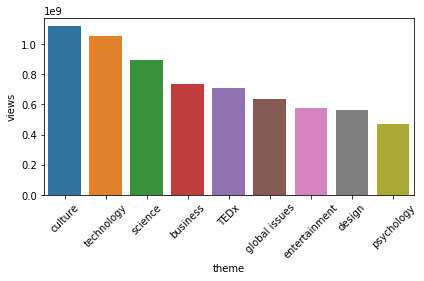

In [11]:
#Most popular themes
x1 = theme_ttlk.loc[:,['theme','views']]
x2 = x1.groupby(['theme']).sum().reset_index()
mpt_views = x2.sort_values(by=['views'], ascending = False)
mpt10_views = mpt_views[0:9]
sns.barplot(x='theme', y='views', data=mpt10_views)
sns.set_context("paper")
plt.rcParams["xtick.labelsize"] = 10
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

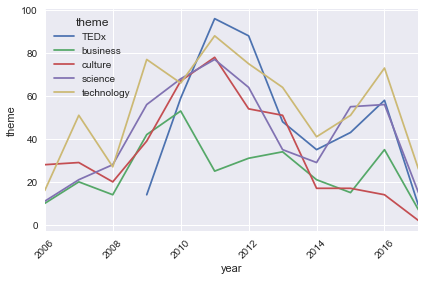

In [12]:
# Plot growth in popular themes by year
x3 = theme_ttlk['theme'].isin(["culture", "technology", "science", "business", "TEDx"])
x4 = theme_ttlk[x3]
x5 = x4['year'] > '2005'
x6 = x4[x5]
x7 = x6.loc[:,['year','theme']]
x7['one'] = 1
sns.set()
theme_year_count = x7.pivot_table('one', index='year', columns='theme', aggfunc='sum').plot()
plt.ylabel('theme')
sns.set_context("paper")
plt.rcParams["xtick.labelsize"] = 8
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The first bar graph displays the most popular themes by number of occurences (i.e. how many times did the specific theme appear across all TED talks). The five most popular themes (in order of popularity) are: culture, technology, science, business and TEDx. What's more interesting is the second plot, where the popularity of the five most popular themes are tracked over time. In general, we see oscillating patterns accross all themes. However, themes such as technology and science are showing increasing popularity over time, whereas popularity for culture oriented talks are declining. Business remains relatively stagnant, and TEDx spiked in 2011, securing itself as the most popular theme at the time. 

## Analysis of Views

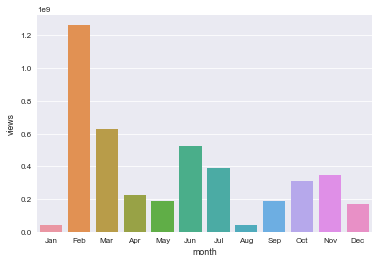

In [13]:
## Views by Month
vm_ttlk = ttlk.loc[:,['month', 'views']]
month_view = vm_ttlk.groupby(['month']).sum().reset_index()
sns.barplot(x='month', y='views', data=month_view, order=month_order)
plt.show()

In [14]:
# Views by Day within specific months
vmd_ttlk = ttlk.loc[:,['month', 'day','views']]
month_day_view = vmd_ttlk.groupby(['month','day']).sum().sort_values('views', ascending = False).reset_index()
month_day_view.head()

,month,day,views
0,Feb,01,237381105
1,Mar,02,157852902
2,Feb,27,129872995
3,Feb,26,107620389
4,Jun,25,92618056


The above data aggregates views by month and days across all active years. The amount of views in February are significantly higher in comparison to other months. As well, the spike from January to February is drastic. View are extremely low in January and August, possibly due to Universty students in North America being on break and spending more time outside of the Internet. There is a slight decreasing pattern in views from February onwards. When breaking this down by specific days, we notice that the beginning and end of February are high points from a viewing perspective. Interestingly, Mar 2nd and June 25th also have high viewing points. 

In [15]:
# Views by Popular Theme within specific months
tmv_ttlk = x4.loc[:,['theme', 'month','views']]
theme_month_view = tmv_ttlk.groupby(['theme','month']).sum().sort_values('views', ascending = False).reset_index()
theme_month_view.head()

,theme,month,views
0,culture,Feb,482636127
1,technology,Feb,306694971
2,science,Feb,295198017
3,business,Feb,208854240
4,technology,Mar,191907403


In [16]:
theme_month_view.tail()

,theme,month,views
55,culture,Jan,6933627
56,technology,Jan,5461453
57,science,Jan,4814413
58,culture,Aug,996127
59,technology,Aug,271241


Looking at views broken down by theme and month, we can see that culture, technology, science and business tend to have a higher number of views in February, and technology seeing its high in March. On the opposite end, views are lower for culture, technology and science in January, and lower in August for culture and technology.

Now, let's take a look at the change in views by month for specific themes, on a more granular level. 

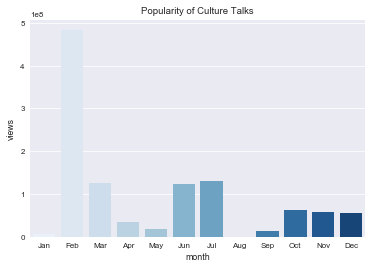

In [26]:
myList = ['culture', 'technology', 'science', 'business', 'TEDx']
sns.barplot(x = 'month', y = 'views', data = theme_month_view[theme_month_view['theme'] == 'culture'], order = month_order, palette = "Blues")
plt.title('Popularity of Culture Talks')
plt.show()

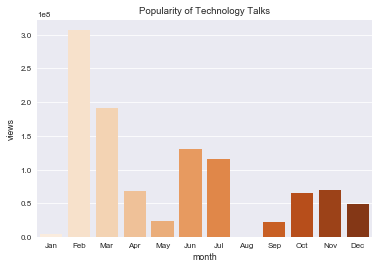

In [18]:
sns.barplot(x = 'month', y = 'views', data = theme_month_view[theme_month_view['theme'] == 'technology'], order = month_order, palette = "Oranges")
plt.title('Popularity of Technology Talks')
plt.show()

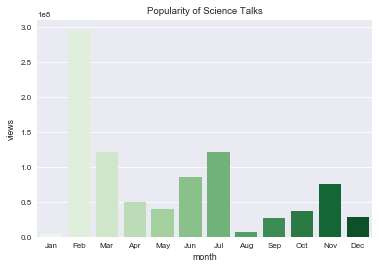

In [29]:
sns.barplot(x = 'month', y = 'views', data = theme_month_view[theme_month_view['theme'] == 'science'], order = month_order, palette = "Greens")
plt.title('Popularity of Science Talks')
plt.show()

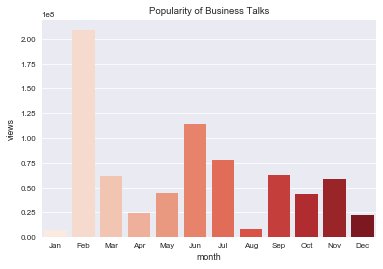

In [30]:
sns.barplot(x = 'month', y = 'views', data = theme_month_view[theme_month_view['theme'] == 'business'], order = month_order, palette = "Reds")
plt.title('Popularity of Business Talks')
plt.show()

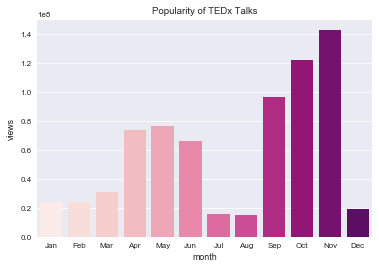

In [31]:
sns.barplot(x = 'month', y = 'views', data = theme_month_view[theme_month_view['theme'] == 'TEDx'], order = month_order, palette = "RdPu")
plt.title('Popularity of TEDx Talks')
plt.show()

Similar to the overal monthly trends, we notice that culture, technology, science and business show an overal decreasing trend in views, with a spike in February. In contrast, TEDx Talks show the opposite trend, with an overall increasing trend month-over-month. 

## Analysis of Comments

In [22]:
ttlk['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

On average, we see aproximately 192 comments per TED talk. As seen before, the maximum number of comments on any video was 6406. Along with a standard deviation of approximately 282, we can infer that many outliers may exist thus skeweing the average. 

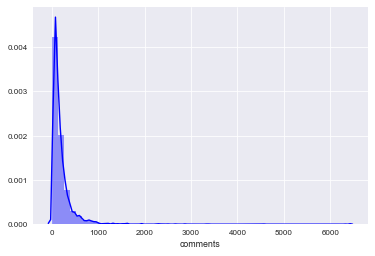

In [23]:
sns.distplot(ttlk['comments'], color = "Blue")
plt.show()

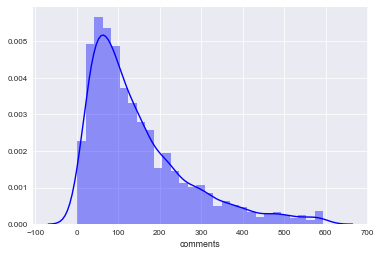

In [24]:
sns.distplot(ttlk[ttlk['comments'] < 600]['comments'], color = "Blue")
plt.show()

From the above two distribution plots, we can see the number of comments per video ranges between 0 and approximately 600. Considering the average number of comments for the second graph is approximately 149, we can state that the previous measure for average number of comments was skewed by multiple outliers. 

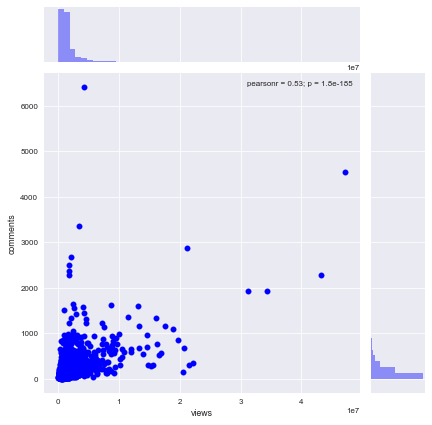

In [25]:
sns.jointplot(x='views', y='comments', data=ttlk, color = "Blue")
plt.show()

Possibly the most interesting finding, was looking at the relationship between views and comments. From the above graph, we notice a correlation coefficient of approximately 0.53, which indicates a medium correlation between comments and views. 